In [66]:
from IPython.display import display, HTML

display(
    HTML(
        """<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""
    )
)

<font size="5" color="red"><b>ch2. 군집분석</b></font>

# 1절. 군집모델(클러스터링)

-클러스터(cluster) : 독립변수의특성이유사한데이터의그룹 -클러스터링(clustering) : 주어진데이터를여러개의클러스터로구분하는것

1. 중심기반클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
   <img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
   style="display: block; margin-left: 0; width: 20%;">
2. 연결기반클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
   <img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
   width="300"
   style="display: block; margin-left: 0; width: 20%;">
3. 밀도기반클러스터링(DBSCAN의변형으로OPTICS) : https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
   <img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
   width="300"
   style="display: block; margin-left: 0; width: 20%;">


In [67]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
# sklearn의 로직들이 멀티 스레드로 실행 → 단일스레드 작업을 하도록

# 2절. K-Means 클러스트링

- 가장 단순하고 빠른 클러스터링 알고리즘
- 클러스터의 중심을 찾아가는 알고리즘
- 세부 알고리즘 : 교안 6p


In [68]:
import matplotlib.pyplot as plt

# 그래프를 더 높은 해상도로 그려줌
%config InlineBackend.figure_format = 'retina'
# 한글 설정
plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False) # 축의 - 꺠짐 방지

In [69]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification

# 데이터 생성
X, y = make_classification(
    n_samples=20,  # 데이터 갯수 (기본값 100)
    n_features=2,  # 독립변수 갯수 (기본값 20)
    n_informative=2,  # 종속변수에 영향을 미치는 독립변수 갯수
    n_redundant=0,  # 종속변수에 영향을 미치지 않는 독립변수 갯수
    n_clusters_per_class=1,  # 각 종속변수 그룹별 서브그룹이 없음
    n_classes=2,  # 종속변수의 클래스 수
    random_state=123,  # 랜덤 시드 고정
)
# print(X)

import numpy as np

# 독립변수와 종속변수를 하나의 배열로 결합
np.c_[X, y][:3]

array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

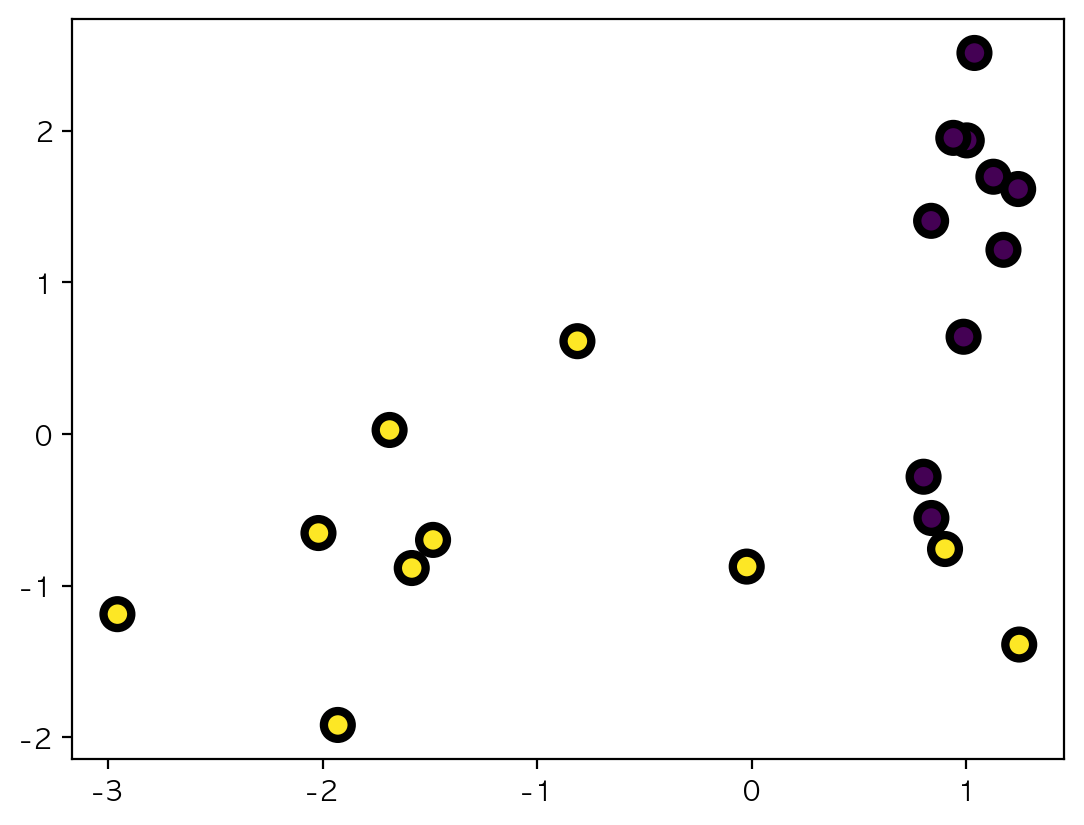

In [70]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, s=100, edgecolors="k", lw=3)
plt.show()

In [71]:
from sklearn.cluster import KMeans

model = KMeans(
    n_clusters=2,  # 군의 갯수
    init="k-means++",  # k-means++(초기중심점을 서로 멀리 초기화), random(중심점랜덤)
    n_init=10,  # 초기중심점을 10번 랜덤으로 실행 후 가장 좋은 모델 선택, auto(자동)
    max_iter=300,  # 최대 반복 횟수
)

# 모델 학습
model.fit(X)

KMeans(n_clusters=2, n_init=10)

In [72]:
# 모델이 정한 두 중심점
c0, c1 = model.cluster_centers_
print("c0 :", c0)
print("c1 :", c1)

c0 : [-1.56258716 -0.69768199]
c1 : [1.01138251 0.83200493]


In [73]:
# 모델이 정한 각 데이터의 군 번호
print("model.labels :", model.labels_)

pred = model.predict(X)
print("예 측 값 :", pred)
print("실 재 값 :", y)

model.labels : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
예 측 값 : [1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 1]
실 재 값 : [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


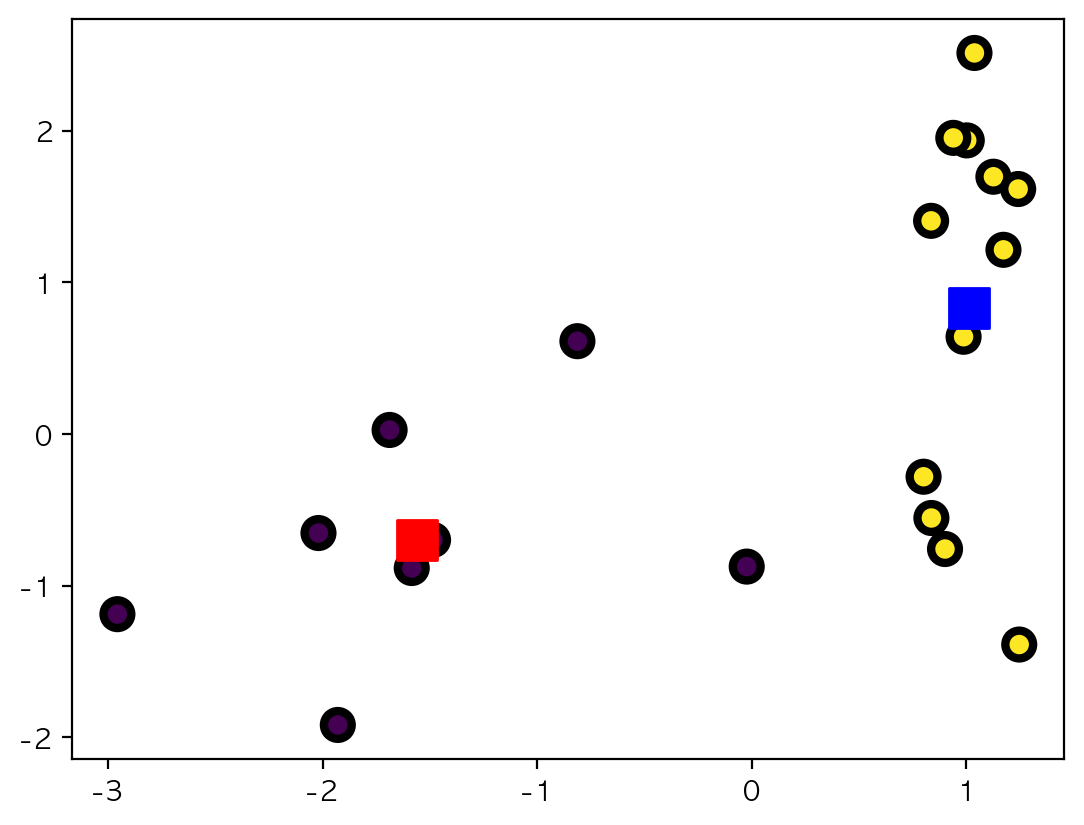

In [74]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0], y=X[:, 1], c=pred, s=100, edgecolors="k", lw=3)
plt.scatter(x=c0[0], y=c0[1], s=200, marker="s", c="r")
plt.scatter(x=c1[0], y=c1[1], s=200, marker="s", c="b")
plt.show()

In [75]:
import sklearn

print(f"sklearn 버전: {sklearn.__version__}")

import sys

print("현재 Python 경로:", sys.executable)
print("현재 가상환경:", sys.prefix)

sklearn 버전: 1.2.1
현재 Python 경로: /Users/teamkim/anaconda3/envs/ml-dl-nlp/bin/python
현재 가상환경: /Users/teamkim/anaconda3/envs/ml-dl-nlp


In [76]:
import sklearn

print(f"sklearn 버전: {sklearn.__version__}")

import sys

print("현재 Python 경로:", sys.executable)
print("현재 가상환경:", sys.prefix)

sklearn 버전: 1.2.1
현재 Python 경로: /Users/teamkim/anaconda3/envs/ml-dl-nlp/bin/python
현재 가상환경: /Users/teamkim/anaconda3/envs/ml-dl-nlp


## cf. Normalizer 적용


In [77]:
import sklearn

print(f"sklearn 버전: {sklearn.__version__}")

import sys

print("현재 Python 경로:", sys.executable)
print("현재 가상환경:", sys.prefix)

sklearn 버전: 1.2.1
현재 Python 경로: /Users/teamkim/anaconda3/envs/ml-dl-nlp/bin/python
현재 가상환경: /Users/teamkim/anaconda3/envs/ml-dl-nlp


In [78]:
import pandas as pd
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [79]:
model = KMeans(
    n_clusters=2,  # 군의 갯수
    init="k-means++",  # k-means++(초기중심점을 서로 멀리 초기화), random(중심점랜덤)
    n_init=10,  # 초기중심점을 10번 랜덤으로 실행 후 가장 좋은 모델 선택, auto(자동)
    max_iter=300,  # 최대 반복 횟수
)

model.fit(Xnor)

KMeans(n_clusters=2, n_init=10)

In [80]:
# 모델이 정한 각 데이터의 군 번호
model.labels_

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int32)

In [81]:
# 모델이 그룹핑한 결과
model.labels_

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1],
      dtype=int32)

In [82]:
# 모델이 정한 중심점
model.cluster_centers_

array([[-0.77398837, -0.33522479],
       [ 0.64128684,  0.34902823]])

In [83]:
d0, d1 = model.cluster_centers_
print("d0 :", d0)
print("d1 :", d1)

d0 : [-0.77398837 -0.33522479]
d1 : [0.64128684 0.34902823]


In [84]:
Xnor[model.labels_ == 0]

Xnor[model.labels_ == 1]

array([[ 0.3821159 ,  0.92411441],
       [ 0.46005267,  0.88789162],
       [ 0.76493676, -0.64410538],
       [ 0.51161542,  0.85921456],
       [ 0.83395074, -0.55183889],
       [ 0.55350265,  0.83284742],
       [ 0.94318094, -0.33227958],
       [ 0.43387458,  0.90097328],
       [ 0.60980605,  0.79255068],
       [ 0.66821427, -0.74396888],
       [ 0.83902767,  0.54408875],
       [ 0.69516439,  0.7188508 ]])

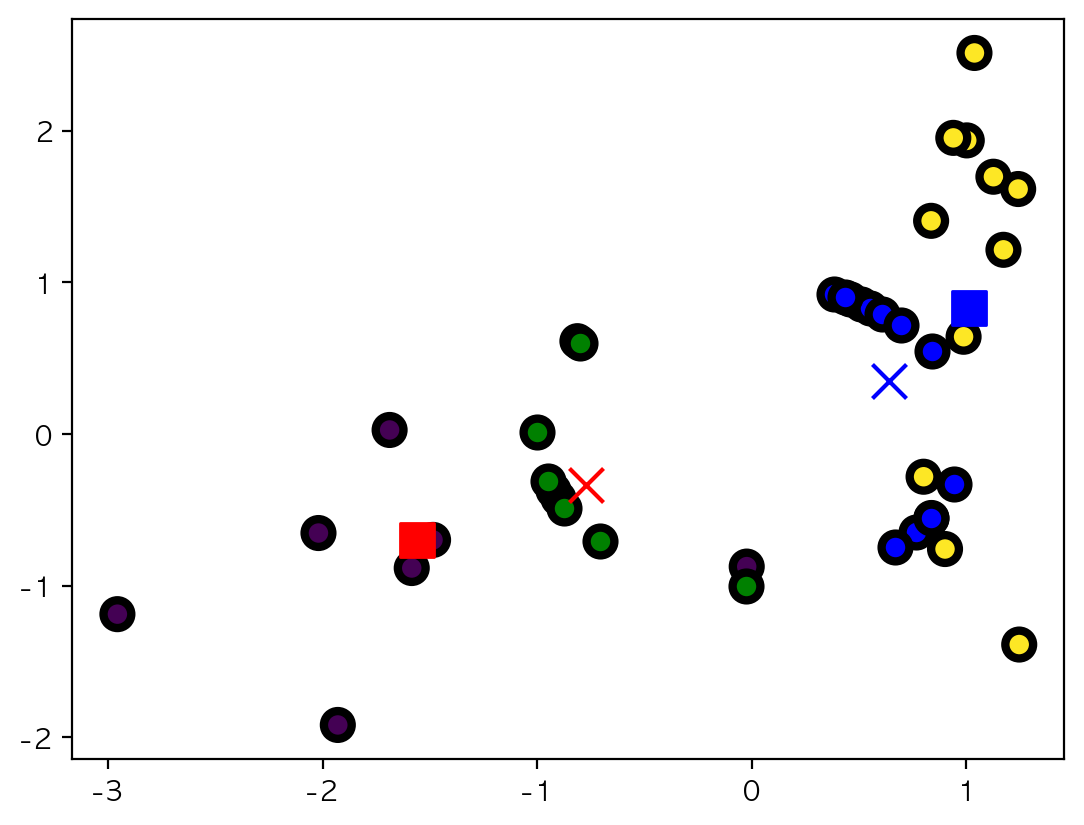

In [85]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=pred, s=100, edgecolors="k", lw=3)
plt.scatter(x=c0[0], y=c0[1], s=150, marker="s", c="r")
plt.scatter(x=c1[0], y=c1[1], s=150, marker="s", c="b")
plt.scatter(
    x=Xnor[model.labels_ == 0, 0], y=Xnor[model.labels_ == 0, 1], c="g", s=100, edgecolors="k", lw=3
)
plt.scatter(
    x=Xnor[model.labels_ == 1, 0], y=Xnor[model.labels_ == 1, 1], c="b", s=100, edgecolors="k", lw=3
)

plt.scatter(x=d0[0], y=d0[1], s=150, marker="x", c="r")
plt.scatter(x=d1[0], y=d1[1], s=150, marker="x", c="b")

plt.show()

## K-Means 클러스터링의 한계점(pt13)

- 군의 특성이 다를 경우
  - 크기
  - 군의 밀도
  - 비구형
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링 (박스플로어 먼저 그려서 이상치 확인)

### - 군의 크기가 다른 경우


In [86]:
import numpy as np

# 랜덤 시드 고정
np.random.seed(0)

# 데이터 생성
# 평균 : -10, 표준편차 : 2인 10행 2열 데이터 : group0
group0 = np.random.normal(loc=-10, scale=2, size=(10, 2))

y = np.full(group0.shape[0], 0)

group0 = np.c_[group0, y]
group0[:2]

array([[-6.47189531, -9.19968558,  0.        ],
       [-8.04252403, -5.5182136 ,  0.        ]])

In [87]:
# 평균 : 10, 표준편차 : 2인 10행 2열 데이터 : group1
np.random.seed(0)
group1 = np.random.normal(loc=10, scale=2, size=(10, 2))
y = np.full(group1.shape[0], 1)

group1 = np.c_[group1, y]
group1[:2]

array([[13.52810469, 10.80031442,  1.        ],
       [11.95747597, 14.4817864 ,  1.        ]])

In [88]:
# 평균 : 0, 표준편차 : 5인 100행 2열 데이터 : group2
np.random.seed(0)
group2 = np.random.normal(loc=0, scale=5, size=(100, 2))
y = np.full(group2.shape[0], 2)

group2 = np.c_[group2, y]
group2[:2]

array([[ 8.82026173,  2.00078604,  2.        ],
       [ 4.89368992, 11.204466  ,  2.        ]])

In [89]:
data = np.r_[group0, group1, group2]
data[:3], data.shape

(array([[ -6.47189531,  -9.19968558,   0.        ],
        [ -8.04252403,  -5.5182136 ,   0.        ],
        [ -6.26488402, -11.95455576,   0.        ]]),
 (120, 3))

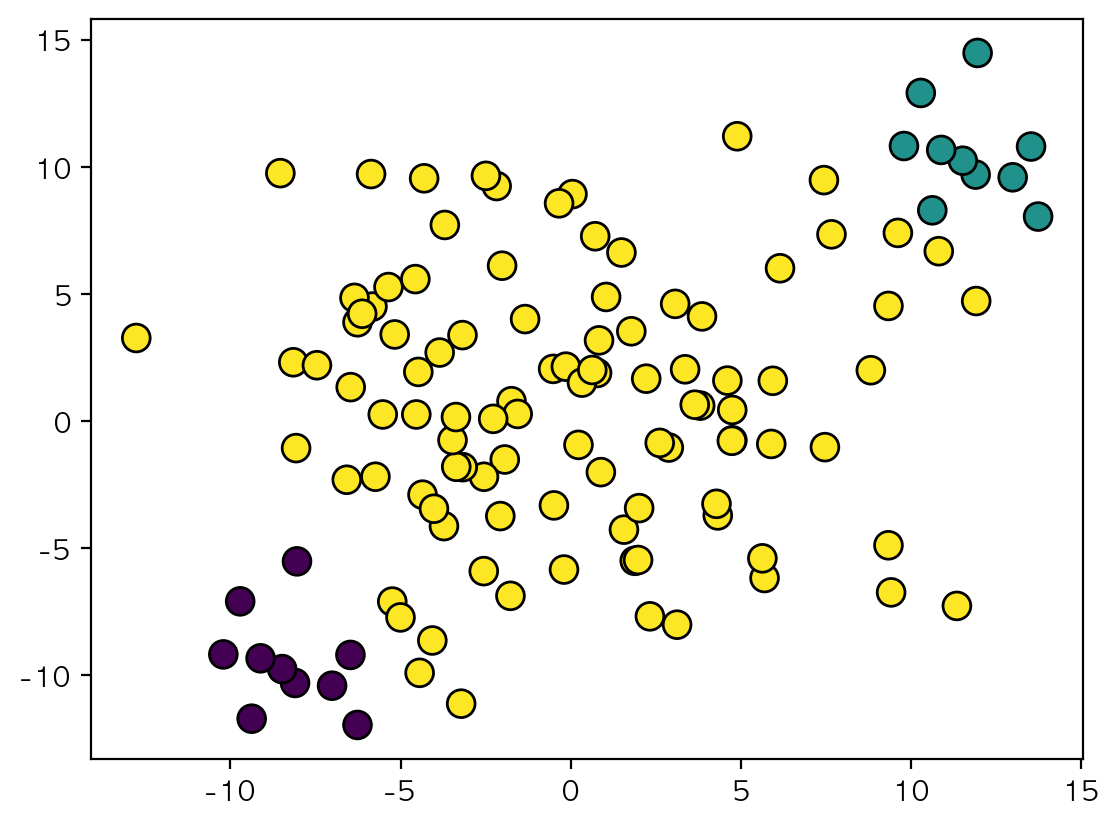

In [90]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=data[:, 2], s=100, edgecolors="k")

In [91]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init="k-means++", n_init="auto", max_iter=300)
model.fit(data[:, :2])

KMeans(n_clusters=3, n_init='auto')

In [92]:
# 군의 중심점
c = model.cluster_centers_
c

array([[-0.12037063,  1.46984181],
       [-5.39714775, -6.77655636],
       [10.20429416,  8.68042057]])

In [93]:
# print('model.labels_ :', model.labels_)
pred = model.predict(data[:, :2])  # 모델이 클러스터링한 결과 (=model.labels_)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 2], dtype=int32)

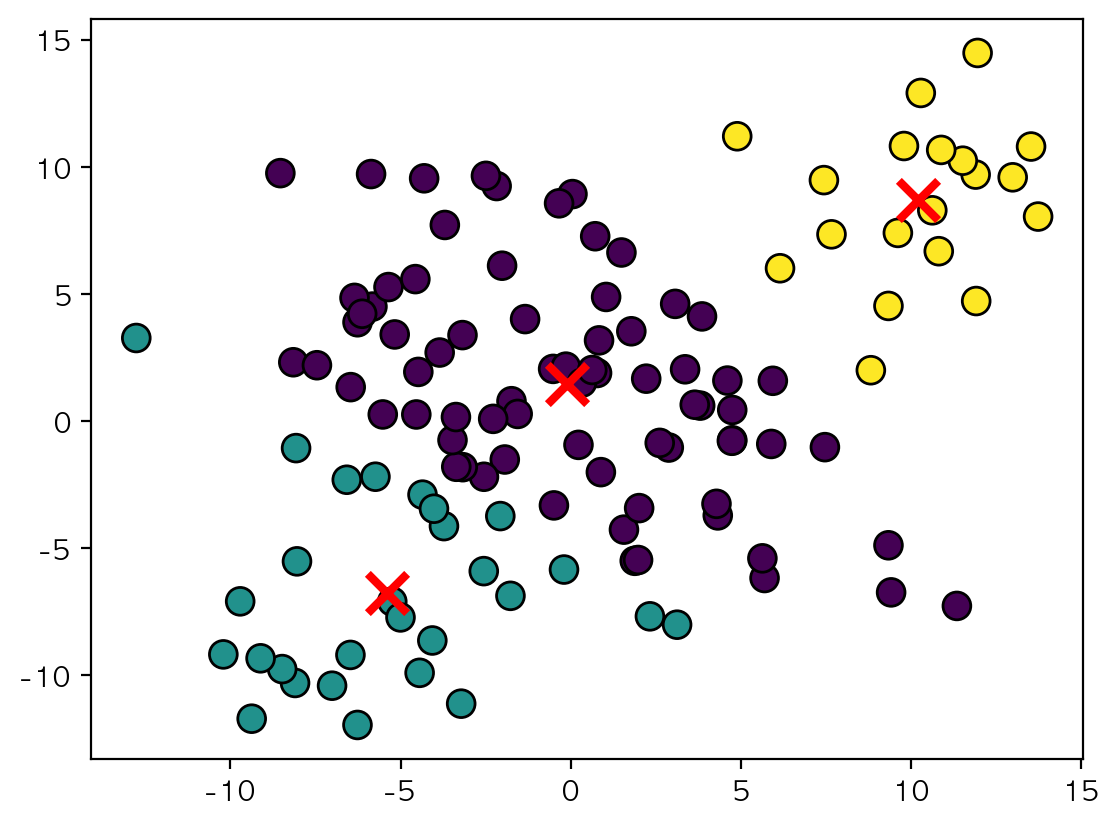

In [94]:
plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100, edgecolors="k")
plt.scatter(x=c[:, 0], y=c[:, 1], s=200, marker="x", c="r", lw=3)
plt.show()

In [95]:
model = KMeans(n_clusters=6, init="k-means++", n_init="auto")
model.fit(data[:, :2])

KMeans(n_clusters=6, n_init='auto')

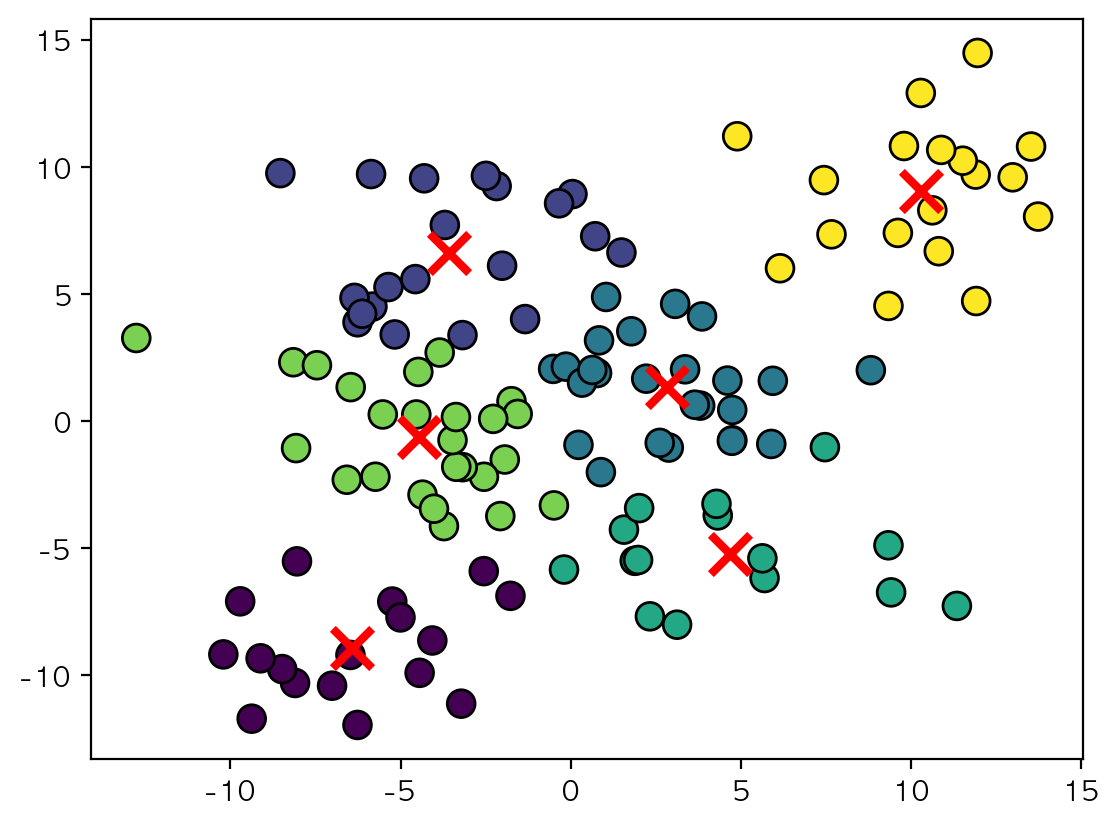

In [ ]:
c = model.cluster_centers_  # 중심점
pred = model.labels_  # 모델이 클러스터링한 결과 (=model.labels_)

plt.scatter(x=data[:, 0], y=data[:, 1], c=pred, s=100, edgecolors="k")
plt.scatter(x=c[:, 0], y=c[:, 1], s=200, marker="x", c="r", lw=3)
plt.show()

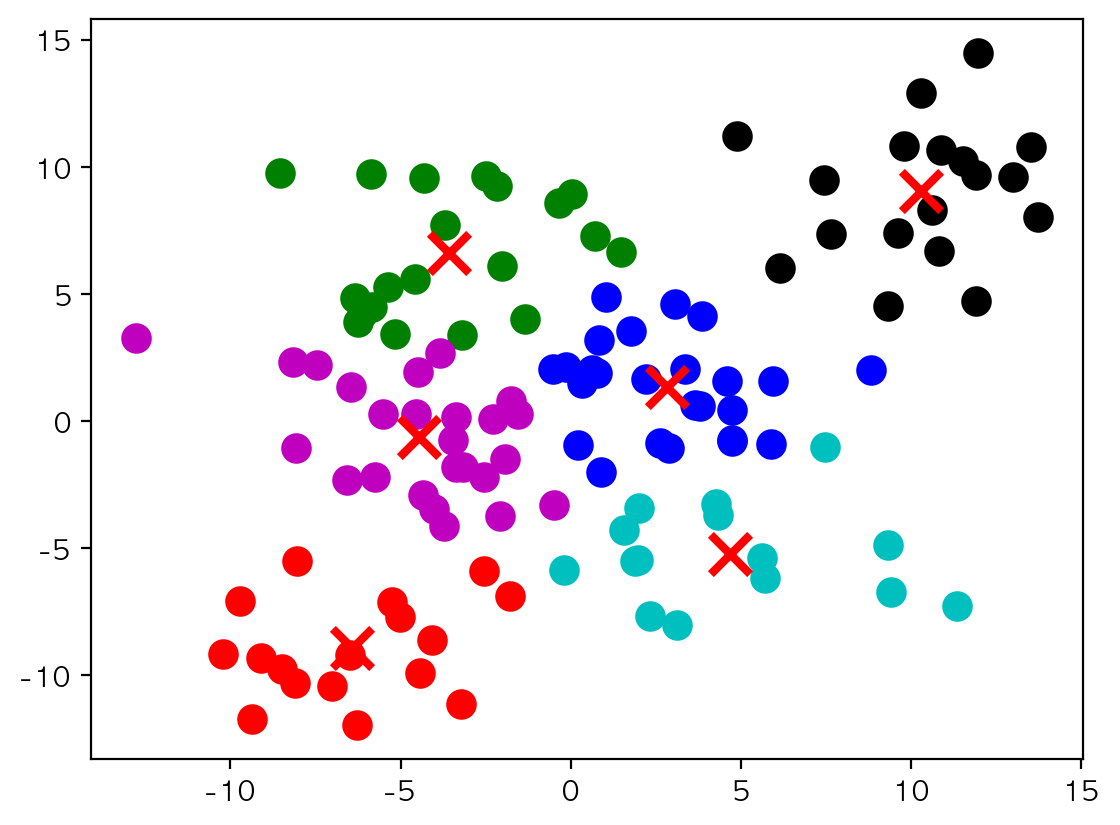

In [97]:
colors = ["r", "g", "b", "c", "m", "k"]  # 0,1,2,3,4,5

# data[pred == 0,0]

# plt.scatter(x=data[pred == 0, 0], y=data[pred == 0, 1], c=colors[0], s=100)

for i in range(len(c)):
    # print(i)
    plt.scatter(x=data[pred == i, 0], y=data[pred == i, 1], c=colors[i], s=100)

plt.scatter(x=c[:, 0], y=c[:, 1], s=200, marker="x", c="r", lw=3)
plt.show()

# 3절. Hierarchical 클러스터링 (계층적 군집)

- 계측적분석(linkage) → dendrogram → fcluster를 이용하여 클러스터
  - 군끼리 묶으면서, 최종적으로 하나의 군집이 될 떄까지 묶는 클러스터링
  - 군집의 수를 미리 정해주지 않음
  - 군집간의 거리 기반으로 클러스터링


In [108]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [118]:
# 계층적 군집 적용을 위해 라벨인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

iris["species"] = le.fit_transform(iris["species"])

# 50개씩 뿌리기
iris.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [ ]:
from scipy.cluster.hierarchy import linkage

# method : 거리계산을 어떻게 할지
# method='complete' : 두 클러스터에서 가장 먼 거리
# method='single' : 두 클러스터에서 가장 가까운 거리
# method='average' : 두 클러스터내에서 각 점에서 다른 클러스터의 모든 점의 평균 거리
# method='centroid' : 두 클러스터에서 중심 거리
# method='ward' : 두 클러스터에서 최소 분산 거리
cluster_model = linkage(iris, method="complete")

# cluster_model

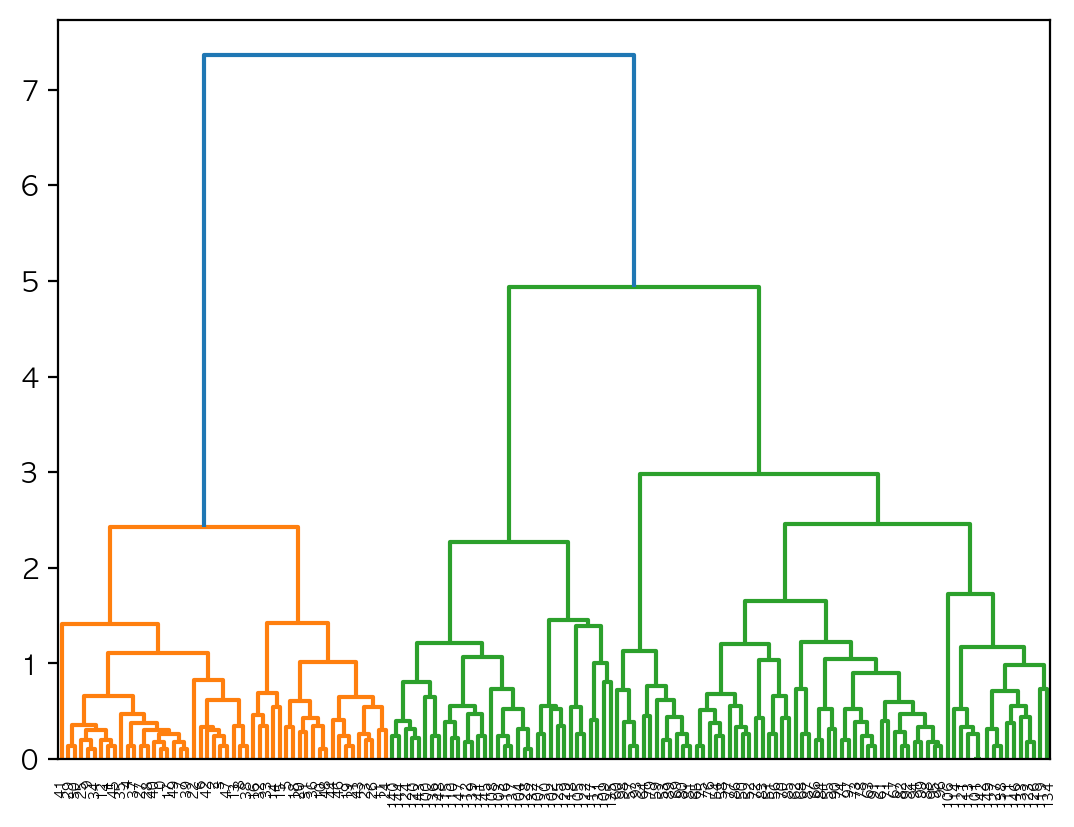

<Figure size 10000x10000 with 0 Axes>

In [ ]:
# dendrogram
from scipy.cluster.hierarchy import dendrogram

dendrogram(cluster_model, labels=iris.index)
plt.figure(figsize=(100, 100))
plt.savefig("./data/ch02_iris.png", dpi=300, bbox_inches="tight")
plt.show()

In [177]:
from scipy.cluster.hierarchy import fcluster  # 군집화

fcluster(cluster_model, t=4, criterion="distance")  # dendrogram 의 y축 값  # 군집화 기준

# criterion="distance" 일 떄, t값은 dendrogram 의 y축 값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [178]:
fcluster(cluster_model, t=3, criterion="maxclust")  # 군집화 기준

# criterion="maxclust" 일 떄, t값은 클러스트의 갯수 (군집화된 그룹 갯수)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [179]:
fcluster(cluster_model, t=5, criterion="distance")  # dendrogram 의 y축 값  # 군집화 기준

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# 4절. DBSCAN 클러스터링

- 연결 기반 (밀도기반) 군집화 알고리즘 (이상치를 자동 감지)
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐


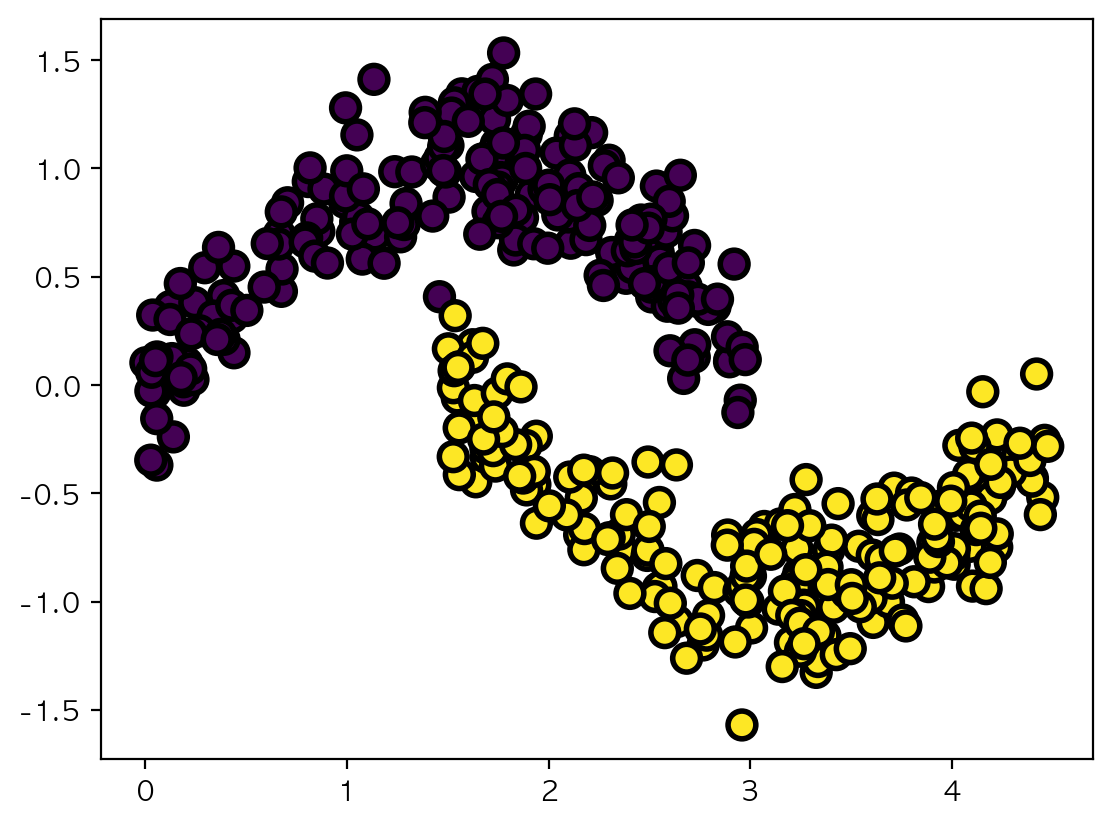

In [221]:
X1 = np.random.rand(200) * 3  # 0<=X1<2의 실수 난수 200개
noise = np.random.normal(0, 0.2, 200)
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(200, 0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(200, 1)]
data = np.r_[group1, group2]

plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=100, edgecolors="k", lw=2)

In [222]:
data[::100]

array([[ 1.23730136,  0.98446724,  0.        ],
       [ 0.03176682,  0.05847217,  0.        ],
       [ 2.73730136, -0.87981822,  1.        ],
       [ 1.53176682,  0.06573029,  1.        ]])

In [223]:
from sklearn.cluster import DBSCAN

# 반경 0.3이내에 최소 10개는 있어야 군집 시작
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data[:, :2])

DBSCAN(eps=0.3, min_samples=10)

In [224]:
labels = db.labels_  # 모델이 군집화한 결과 (-1은 이상치 인식)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)  # 클러스터 수
n_noise_ = list(labels).count(-1)
print(f"이상치를 제외한 클러스터수 :{n_clusters_}, 이상치갯수:{n_noise_}개")

이상치를 제외한 클러스터수 :2, 이상치갯수:2개


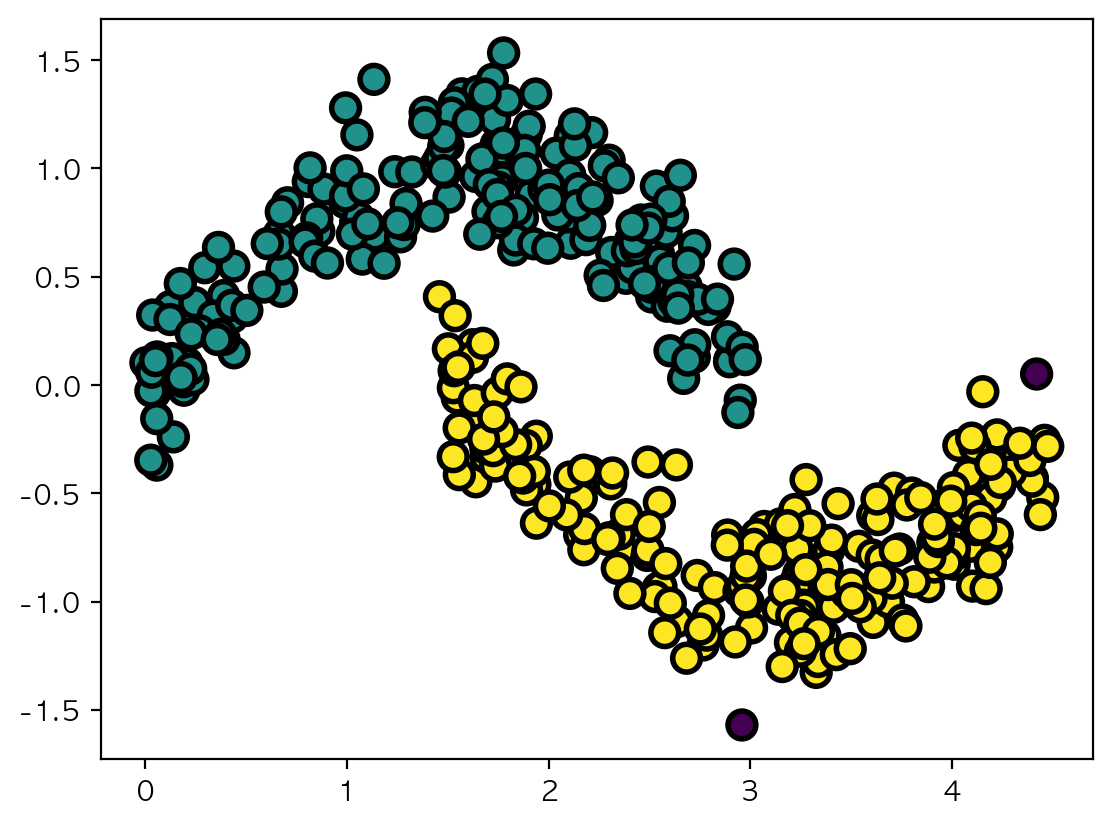

In [ ]:
plt.scatter(data[:, 0], data[:, 1], c=labels, s=100, edgecolors="k", lw=2)

plt.show()

In [ ]:
import sklearn

print(f"sklearn 버전: {sklearn.__version__}")

import sys

print("현재 Python 경로:", sys.executable)
print("현재 가상환경:", sys.prefix)

sklearn 버전: 1.2.1
현재 Python 경로: /Users/teamkim/anaconda3/envs/ml-dl-nlp/bin/python
현재 가상환경: /Users/teamkim/anaconda3/envs/ml-dl-nlp


# 5절. 군집 모형 성능평가

- score메소드를 통해 예측 모형 평가 (분류, 회귀)
- metrics 모듈의 메소드를 통해 군집 모형 평가

## 5.1 metrics 함수 이용

- 클러스터의 소속과 갯수를 모두 알고 있을 경우 평가


In [194]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
125,7.2,3.2,6.0,1.8,2


In [196]:
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]

iris_X.shape, iris_y.shape

((150, 4), (150,))

In [203]:
iris_model3 = KMeans(n_clusters=3, n_init=10, random_state=1)
iris_model3.fit(iris_X)

KMeans(n_clusters=3, n_init=10, random_state=1)

In [207]:
pred = iris_model3.labels_
# pred = iris_model3.predict(iris_X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [208]:
# predict 조정을 위해 : np.choose(arg1, arg2)
np.choose([3, 2, 2, 3], [0, 10, 20, 30])

array([30, 20, 20, 30])

In [212]:
np.choose([1, 1, 1, 1, 0, 0, 0, 2, 2, 2], [1, 0, 2])

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

In [214]:
pred3 = np.choose(iris_model3.labels_, [1, 0, 2])
pred3  # 조회된 예측값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [217]:
# 3개 cluster로 군집화한 자료
print("실재값", iris_y[::50])
print("예측값", pred3[::50])

실재값 0      0
50     1
100    2
Name: species, dtype: int64
예측값 [0 1 2]


In [232]:
# 3개 cluster로 군집화한 자료
iris_y3 = np.array([0] * 50 + [1] * 100)
print("실재값", iris_y3)

실재값 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [233]:
iris_model2 = KMeans(n_clusters=2, n_init=10, random_state=1)
iris_model2.fit(iris_X)

KMeans(n_clusters=2, n_init=10, random_state=1)

In [234]:
pred2 = iris_model2.labels_
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [235]:
# 2개 cluster로 군집화한 자료
iris_y2 = np.array([0] * 50 + [1] * 100)
print("실재값", iris_y2)
print("예측값", pred2)

실재값 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [240]:
# 클러스트가 3개인 경우 평가
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(
    # 실재값
    labels_true=iris_y,
    # 예측값
    labels_pred=pred3,
)

0.7302382722834697

In [239]:
# 클러스트가 2개인 경우 평가
adjusted_rand_score(
    # 실재값
    labels_true=iris_y2,
    # 예측값
    labels_pred=pred2,
)

0.920405050901892

In [241]:
# mutual_info_score : 상호 의존도를 나타내는 지표
from sklearn.metrics import mutual_info_score

# 클러스터가 3개인 경우 평가
mutual_info_score(labels_true=iris_y, labels_pred=pred3)

0.8255910976103356

In [247]:
# 클러스트가 2개인 경우 평가
mutual_info_score(labels_true=iris_y2, labels_pred=pred2)

0.5596576064224734

In [246]:
from sklearn.metrics import v_measure_score

# 클러스트가 3개인 경우 평가
v_measure_score(labels_true=iris_y, labels_pred=pred3)

0.7581756800057784

In [245]:
# 2개 그룹으로 군집화라는 것이 좋은 성능이다.
v_measure_score(labels_true=iris_y2, labels_pred=pred2)

0.870385156563164

## 5.2. 실루엣계수

- 클러스터 개수, 소속을 모두 모르고 있을 경우 평가

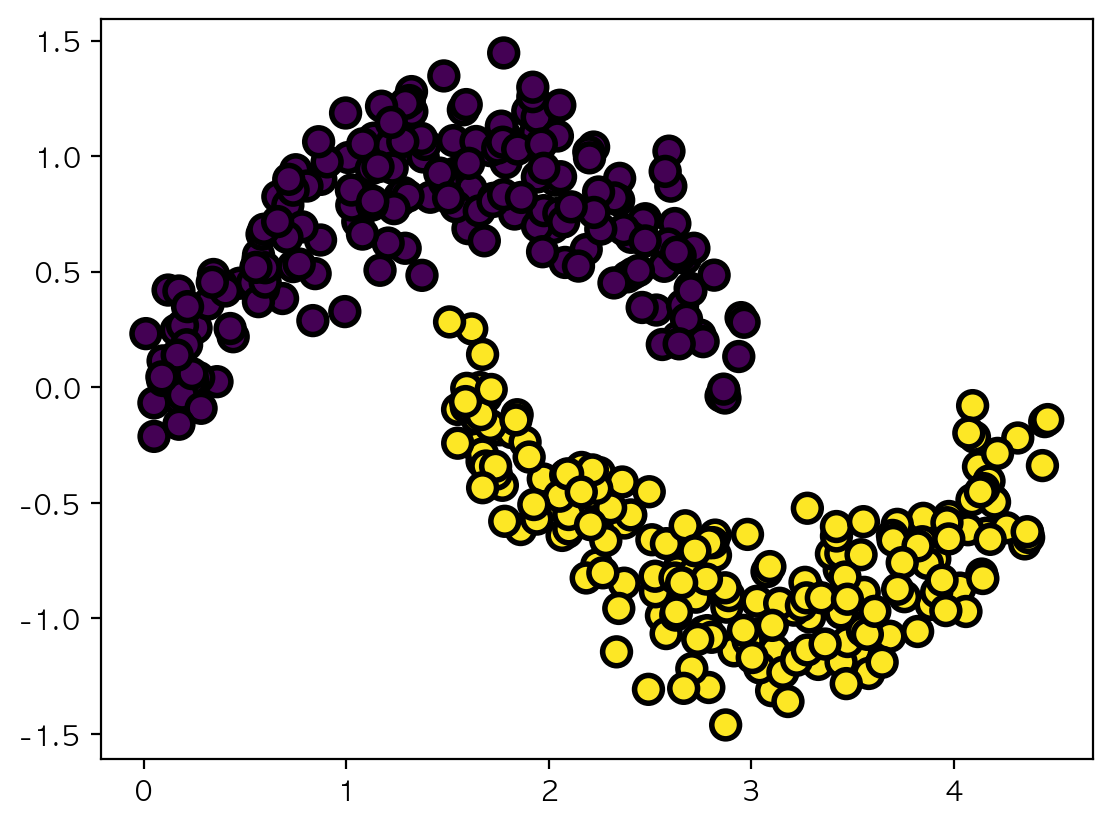

In [248]:
X1 = np.random.rand(200) * 3  # 0<=X1<2의 실수 난수 200개
noise = np.random.normal(0, 0.2, 200)
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(200, 0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(200, 1)]
data = np.r_[group1, group2]

plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=100, edgecolors="k", lw=2)
plt.show()

In [251]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    model = KMeans(n_clusters=n_clusters, n_init=10, random_state=2)
    model.fit(data[:,:-1])
    score = silhouette_score(X=data[:, :-1], labels=model.labels_)
    print(f"클러스트 개수 : {n_clusters}, 실루엣 계수 : {score}")

# 실루엣 개수가 장 놓은 6개로 클러스터링 할 예정

클러스트 개수 : 2, 실루엣 계수 : 0.5248498818526892
클러스트 개수 : 3, 실루엣 계수 : 0.456326693386477
클러스트 개수 : 4, 실루엣 계수 : 0.460884370363115
클러스트 개수 : 5, 실루엣 계수 : 0.4468665329661439
클러스트 개수 : 6, 실루엣 계수 : 0.4992659740741884
클러스트 개수 : 7, 실루엣 계수 : 0.4872132645057563
클러스트 개수 : 8, 실루엣 계수 : 0.4737456252936801
클러스트 개수 : 9, 실루엣 계수 : 0.4691913415324015
클러스트 개수 : 10, 실루엣 계수 : 0.4649821066027117


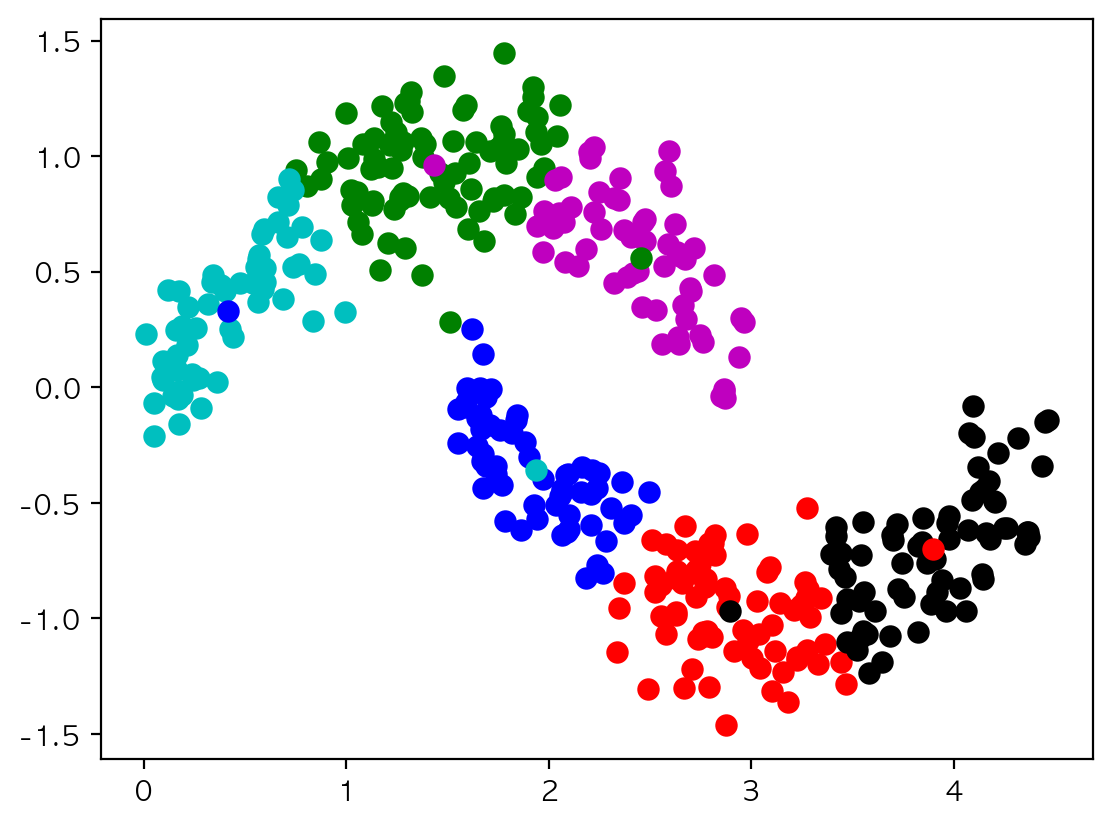

In [264]:
# 실루엣 계수 평가
model = KMeans(n_clusters=6, n_init=10, init="k-means++", random_state=2)
model.fit(data[:, :-1])

center = model.cluster_centers_
color = ["r", "g", "b", "c", "m", "k"] # 4, 2, 3 vs 0, 1, 5
color2 = ["k", "m", "c", "b", "g", "r"] # 4, 2, 3 vs 0, 1, 5

pred = model.labels_

for i in range(len(center)):
    plt.scatter(data[pred == i, 0], data[pred == i, 1], c=color[i], s=50)
    plt.scatter(center[i, 0], center[i, 1], c=color2[i], s=50, lw=1)

plt.show()


